## Converting fluid inclusion densities to depths
- Note, you will have to have CoolProp installed for this to work, if you have python installed through anaconda, conda install -c conda-forge coolprop in the command line normally works well

In [1]:
#!pip install CoolProp

In [2]:
import CoolProp.CoolProp as cp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import DiadFit as pf
import os
pd.set_option('display.max_columns', None)

In [3]:
#Import all FI data.
lei_mi_new=pd.read_excel("Leilani-MI_4review.xlsx", 'Sheet1')
lei_mi_new=lei_mi_new.drop(columns=['Unnamed: 0'])
lei_mi_new

,filename_x,um/px,X,Y,Bub x,Bub y,Density,Corrected_Splitting,Splitting,Diad1_Cent,Diad1_Area,Diad1_Sigma,Diad1_Gamma,Residual_Diad1,Diad2_Cent,Diad2_Area,Diad2_Sigma,Diad2_Gamma,Residual_Diad2,HB1_Cent,HB1_Area,HB2_Cent,HB2_Area,C13_Cent,C13_Area,name_for_matching,filename_y,date,power (mW),Int_time (s),accumulations,Mag (X),duration,24hr_time,sec since midnight,Spectral Center,Ne_Correction
0,LL4-21-MI#1,0.11569,92.362000,78.865000,29.837000,29.837000,-0.002516,102.713506,102.939603,1286.491624,35.043382,0.156465,0.156465,1.351721,1389.431227,44.995566,0.139247,0.139247,1.379345,NaN,0,NaN,0,NaN,0,LL4-21-MI#1,LL4-21-MI#1.txt,"October 21, 2022\n",12.010,45,5,50,"['0h', '3m', '46s']",12:26:50 PM\n,44810,1325.004,0.997804
1,LL4-21-MI#2,0.11569,86.715243,72.321261,54.221683,54.221683,0.104172,102.997219,103.223531,1285.871293,699.601151,0.299494,0.299494,4.660367,1389.094823,1066.945993,0.252199,0.252199,3.553800,NaN,0,NaN,0,NaN,0,LL4-21-MI#2,LL4-21-MI#2.txt,"October 21, 2022\n",12.058,45,5,50,"['0h', '3m', '46s']",12:16:02 PM\n,44162,1325.004,0.997808
2,LL4-21-MI#4,0.11569,46.794470,36.239646,15.275074,15.275074,0.047919,102.847627,103.074687,1286.479327,26.213320,0.096417,0.096417,2.077125,1389.554015,36.403290,0.241365,0.241365,2.111429,NaN,0,NaN,0,NaN,0,LL4-21-MI#4,LL4-21-MI#4.txt,"October 21, 2022\n",20.002,45,5,50,"['0h', '3m', '46s']",12:46:18 PM\n,45978,1325.004,0.997797
3,LL4-21-MI#5,0.11569,27.971890,22.855056,24.491485,20.646426,0.089558,102.958355,103.186325,1286.058199,235.909792,0.260009,0.260009,1.678823,1389.244524,368.899505,0.227832,0.227832,1.846780,NaN,0,NaN,0,NaN,0,LL4-21-MI#5,LL4-21-MI#5.txt,"October 21, 2022\n",12.028,45,5,50,"['0h', '3m', '47s']",1:08:48 PM\n,47328,1325.004,0.997791
4,LL4-21-MI#6,0.11569,38.916819,29.000833,14.357193,14.357193,0.044207,102.837756,103.065623,1286.241091,67.524730,0.248271,0.248271,1.486341,1389.306715,99.042175,0.199543,0.199543,1.459097,NaN,0,NaN,0,NaN,0,LL4-21-MI#6,LL4-21-MI#6.txt,"October 21, 2022\n",12.052,45,5,50,"['0h', '3m', '46s']",1:15:02 PM\n,47702,1325.004,0.997789
5,LL4-FI3-4-MI#1,0.11569,34.001863,30.846776,26.387521,26.387521,0.092818,102.967024,103.196375,1285.998261,364.710423,0.274586,0.274586,2.773068,1389.194636,555.447553,0.238260,0.238260,3.115223,NaN,0,NaN,0,NaN,0,LL4-FI3-4-MI#1,LL4-FI3-4-MI#1.txt,"October 21, 2022\n",12.072,45,5,50,"['0h', '3m', '47s']",2:14:23 PM\n,51263,1325.004,0.997778
6,LL4-FI3-4-MI#2,0.11569,29.833451,25.838690,22.325660,22.325660,0.084876,102.945906,103.175344,1286.037346,109.442133,0.281944,0.281944,2.105297,1389.212690,161.145258,0.259200,0.259200,2.715281,NaN,0,NaN,0,NaN,0,LL4-FI3-4-MI#2,LL4-FI3-4-MI#2.txt,"October 21, 2022\n",12.039,45,5,50,"['0h', '3m', '46s']",2:23:41 PM\n,51821,1325.004,0.997776
7,LL7-31-MI#1 (1),0.11569,36.393861,31.978220,29.156089,29.156089,0.103171,102.994557,103.225020,1285.952404,1316.772953,0.278129,0.278129,9.848280,1389.177424,1988.496206,0.241801,0.241801,10.400488,NaN,0,NaN,0,NaN,0,LL7-31-MI#1 (1),LL7-31-MI#1 (1).txt,"October 21, 2022\n",11.989,45,5,50,"['0h', '3m', '47s']",3:53:19 PM\n,57199,1325.004,0.997767
8,LL7-31-MI#1,0.11569,36.393861,31.978220,29.156089,29.156089,0.100623,102.987781,103.218138,1285.952565,1355.459460,0.278507,0.278507,8.975399,1389.170703,2025.655278,0.240454,0.240454,9.153692,NaN,0,NaN,0,NaN,0,LL7-31-MI#1,LL7-31-MI#1.txt,"October 21, 2022\n",12.043,45,5,50,"['0h', '3m', '47s']",3:43:03 PM\n,56583,1325.004,0.997768
9,LL7-FI16-MI#2,0.11569,74.332293,63.730499,24.412700,24.412700,0.023007,102.781377,103.011137,1286.384826,516.457222,0.229994,0.229994,8.095214,1389.395962,728.006318,0.170827,0.170827,9.058284,NaN,0,NaN,0,NaN,0,LL7-FI16-MI#2,LL7-FI16-MI#2.txt,"October 21, 2022\n",12.024,45,5,50,"['0h', '3m', '47s']",3:27:32 PM\n,55652,1325.004,0.997770


In [4]:
# Calculate volumes and vol% and add columns to df 
if "MI volume (um3)" in lei_mi_new.columns:
    lei_mi_new=lei_mi_new.drop(columns="MI volume (um3)")
    lei_mi_new.insert(6, "MI volume (um3)",4/3*np.pi*lei_mi_new['X']/2*lei_mi_new['Y']/2*(lei_mi_new['X']+lei_mi_new['Y'])/2)
else:
    lei_mi_new.insert(6, "MI volume (um3)",4/3*np.pi*lei_mi_new['X']/2*lei_mi_new['Y']/2*(lei_mi_new['X']+lei_mi_new['Y'])/2)
if "Bubble volume (um3)" in lei_mi_new.columns:
    lei_mi_new=lei_mi_new.drop(columns="Bubble volume (um3)")
    lei_mi_new.insert(7, "Bubble volume (um3)",4/3*np.pi*lei_mi_new['Bub x']/2*lei_mi_new['Bub y']/2*(lei_mi_new['Bub x']+lei_mi_new['Bub y'])/2)
else:
    lei_mi_new.insert(7, "Bubble volume (um3)",4/3*np.pi*lei_mi_new['Bub x']/2*lei_mi_new['Bub y']/2*(lei_mi_new['Bub x']+lei_mi_new['Bub y'])/2)

if "Bubble volume %" in lei_mi_new.columns:
    lei_mi_new=lei_mi_new.drop(columns="Bubble volume %")
    lei_mi_new.insert(8, "Bubble volume %",100*lei_mi_new['Bubble volume (um3)']/lei_mi_new['MI volume (um3)'])
else:
    lei_mi_new.insert(8, "Bubble volume %",100*lei_mi_new['Bubble volume (um3)']/lei_mi_new['MI volume (um3)'])

lei_mi_new

,filename_x,um/px,X,Y,Bub x,Bub y,MI volume (um3),Bubble volume (um3),Bubble volume %,Density,Corrected_Splitting,Splitting,Diad1_Cent,Diad1_Area,Diad1_Sigma,Diad1_Gamma,Residual_Diad1,Diad2_Cent,Diad2_Area,Diad2_Sigma,Diad2_Gamma,Residual_Diad2,HB1_Cent,HB1_Area,HB2_Cent,HB2_Area,C13_Cent,C13_Area,name_for_matching,filename_y,date,power (mW),Int_time (s),accumulations,Mag (X),duration,24hr_time,sec since midnight,Spectral Center,Ne_Correction
0,LL4-21-MI#1,0.11569,92.362000,78.865000,29.837000,29.837000,653053.116203,27815.961774,4.259372,-0.002516,102.713506,102.939603,1286.491624,35.043382,0.156465,0.156465,1.351721,1389.431227,44.995566,0.139247,0.139247,1.379345,NaN,0,NaN,0,NaN,0,LL4-21-MI#1,LL4-21-MI#1.txt,"October 21, 2022\n",12.010,45,5,50,"['0h', '3m', '46s']",12:26:50 PM\n,44810,1325.004,0.997804
1,LL4-21-MI#2,0.11569,86.715243,72.321261,54.221683,54.221683,522224.056161,166935.077169,31.966179,0.104172,102.997219,103.223531,1285.871293,699.601151,0.299494,0.299494,4.660367,1389.094823,1066.945993,0.252199,0.252199,3.553800,NaN,0,NaN,0,NaN,0,LL4-21-MI#2,LL4-21-MI#2.txt,"October 21, 2022\n",12.058,45,5,50,"['0h', '3m', '46s']",12:16:02 PM\n,44162,1325.004,0.997808
2,LL4-21-MI#4,0.11569,46.794470,36.239646,15.275074,15.275074,73728.206483,3732.317646,5.062266,0.047919,102.847627,103.074687,1286.479327,26.213320,0.096417,0.096417,2.077125,1389.554015,36.403290,0.241365,0.241365,2.111429,NaN,0,NaN,0,NaN,0,LL4-21-MI#4,LL4-21-MI#4.txt,"October 21, 2022\n",20.002,45,5,50,"['0h', '3m', '46s']",12:46:18 PM\n,45978,1325.004,0.997797
3,LL4-21-MI#5,0.11569,27.971890,22.855056,24.491485,20.646426,17013.620223,11950.885045,70.243046,0.089558,102.958355,103.186325,1286.058199,235.909792,0.260009,0.260009,1.678823,1389.244524,368.899505,0.227832,0.227832,1.846780,NaN,0,NaN,0,NaN,0,LL4-21-MI#5,LL4-21-MI#5.txt,"October 21, 2022\n",12.028,45,5,50,"['0h', '3m', '47s']",1:08:48 PM\n,47328,1325.004,0.997791
4,LL4-21-MI#6,0.11569,38.916819,29.000833,14.357193,14.357193,40135.538978,3099.111716,7.721615,0.044207,102.837756,103.065623,1286.241091,67.524730,0.248271,0.248271,1.486341,1389.306715,99.042175,0.199543,0.199543,1.459097,NaN,0,NaN,0,NaN,0,LL4-21-MI#6,LL4-21-MI#6.txt,"October 21, 2022\n",12.052,45,5,50,"['0h', '3m', '46s']",1:15:02 PM\n,47702,1325.004,0.997789
5,LL4-FI3-4-MI#1,0.11569,34.001863,30.846776,26.387521,26.387521,35613.280666,19240.857014,54.027196,0.092818,102.967024,103.196375,1285.998261,364.710423,0.274586,0.274586,2.773068,1389.194636,555.447553,0.238260,0.238260,3.115223,NaN,0,NaN,0,NaN,0,LL4-FI3-4-MI#1,LL4-FI3-4-MI#1.txt,"October 21, 2022\n",12.072,45,5,50,"['0h', '3m', '47s']",2:14:23 PM\n,51263,1325.004,0.997778
6,LL4-FI3-4-MI#2,0.11569,29.833451,25.838690,22.325660,22.325660,22470.386227,11653.101884,51.859820,0.084876,102.945906,103.175344,1286.037346,109.442133,0.281944,0.281944,2.105297,1389.212690,161.145258,0.259200,0.259200,2.715281,NaN,0,NaN,0,NaN,0,LL4-FI3-4-MI#2,LL4-FI3-4-MI#2.txt,"October 21, 2022\n",12.039,45,5,50,"['0h', '3m', '46s']",2:23:41 PM\n,51821,1325.004,0.997776
7,LL7-31-MI#1 (1),0.11569,36.393861,31.978220,29.156089,29.156089,41663.892256,25954.723728,62.295485,0.103171,102.994557,103.225020,1285.952404,1316.772953,0.278129,0.278129,9.848280,1389.177424,1988.496206,0.241801,0.241801,10.400488,NaN,0,NaN,0,NaN,0,LL7-31-MI#1 (1),LL7-31-MI#1 (1).txt,"October 21, 2022\n",11.989,45,5,50,"['0h', '3m', '47s']",3:53:19 PM\n,57199,1325.004,0.997767
8,LL7-31-MI#1,0.11569,36.393861,31.978220,29.156089,29.156089,41663.892256,25954.723728,62.295485,0.100623,102.987781,103.218138,1285.952565,1355.459460,0.278507,0.278507,8.975399,1389.170703,2025.655278,0.240454,0.240454,9.153692,NaN,0,NaN,0,NaN,0,LL7-31-MI#1,LL7-31-MI#1.txt,"October 21, 2022\n",12.043,45,5,50,"['0h', '3m', '47s']",3:43:03 PM\n,56583,1325.004,0.997768
9,LL7-FI16-MI#2,0.11569,74.332293,63.730499,24.412700,24.412700,342452.327302,15236.179153,4.449139,0.023007,102.781377,103.011137,1286.384826,516.457222,0.229994,0.229994,8.095214,1389.3959

In [5]:
### LOAD MELT INCLUSIONS FROM LEILANI
mipath=r"Supplement_Wieser_et_al_G3.xlsx"
mis=pd.read_excel(mipath, 'Melt_Inclusions')

mis['Sample Name']
mis.insert(0,'Sample_ID', mis['Sample Name'].str.split("_", n = 1, expand = True)[0])

misbvol=mis['Vol Bubble/(Vol melt inclusion (excl bubble)) (%)']
misrho=mis['CO2 density (g/cm3)']

mis.head()

,Sample_ID,Description,Sample Name,"Specific ID (LL8 - lab code for F8 Mid July, LL7- lab code for Aug 1st, LL4- lab code for May 30th)","Classification (1=bubble with fermi diad, 2=No bubble, 3=bubble but no fermi diad)",Cracked (for ones without diads),"Na2O (wt%, measured)","Al2O3 (wt%, measured)","P2O5 (wt%, measured)","CaO (wt%, measured)","K2O (wt%, measured)","TiO2 (wt%, measured)","SiO2 (wt%, measured)","MgO (wt%, measured)","FeO (wt%, measured)","MnO (wt%, measured)",Total,"H2O (wt%, measured)","CO2 (ppm, measured)","Amount of PEC (%, calculated)","Na2O (wt%, PEC-corr)","Al2O3 (wt%, PEC-corr)","P2O5 (wt%, PEC-corr)","CaO (wt%, PEC-corr)","K2O (wt%, PEC-corr)","TiO2 (wt%, PEC-corr)","SiO2 (wt%, PEC-corr)","MgO (wt%, PEC-corr)","FeO (wt%, PEC-corr)","MnO (wt%, PEC-corr)","H2O (wt%) (wt%, PEC-corr)","CO2 (ppm) (wt%, PEC-corr)",Fo content (molar),MgO (wt%),SiO2 (wt%),FeO (wt%),Al2O3 (wt%),CaO (wt%),MnO (wt%),NiO (wt%),Melt inclusion Density (g/cm3),Vol Bubble/(Vol melt inclusion (excl bubble)) (%),Mean Δ (cm-1),Correction factor for drift,Standard deviation Δ (cm-1),CO2 density (g/cm3),CO2 in bubble (ppm),Upper 1 σ CO2 in bubble (ppm),Lower 1 σ CO2 in bubble (ppm),"Total CO2 (glass + bubble, ppm)",Total CO2 (PEC-corrected),"VolatileCalc Saturation pressure (measured glass CO2 and H2O content, no PEC-correction)","X CO2 (VolatileCalc, from glass only saturation pressure)",CO2 density EOS method @ 725C (g/cm3),CO2 density EOS method @ 825C (g/cm3),CO2 density EOS method @ 680C (g/cm3),"CO2 in bubble (EOS method, 725C, ppm)","Magmasat Saturation Pressure (bar) (Total, PEC-corr CO2, Measured H2O)","Magmasat XCO2 (Total, PEC-corr CO2, Measured H2O)","Shishkina Saturation Pressure (bar) (Total, PEC-corr CO2, Measured H2O)","Iacono-Marziano Saturation Pressure (bar) (Total, PEC-corr CO2, Measured H2O)","VolatileCalc Saturation pressure (bar) (Total, PEC-corr CO2, Measured H2O)","VolatileCalc Saturation pressure macro (bar) (Total, PEC-corr CO2, Measured H2O)","VolatileCalc XCO2 (Total, PEC-corr CO2, Measured H2O)","Magmasat Saturation Pressure (bar) (Total, PEC-corr CO2, 0.5wt% H2O)","Magmasat XCO2 (Total, PEC-corr CO2, 0.5wt% H2O)","Shishkina Saturation Pressure (bar) (Total, PEC-corr CO2, 0.5wt% H2O)","Iacono-Marziano Saturation Pressure (bar) (Total, PEC-corr CO2, 0.5wt% H2O)","VolatileCalc Saturation pressure (bar) (Total, PEC-corr CO2, 0.5wt% H2O)","VolatileCalc Saturation pressure macro (bar) (Total, PEC-corr CO2, 0.5wt% H2O)","VolatileCalc XCO2 (Total, PEC-corr CO2, 0.5wt% H2O)",Diff (Measured H2O vs 0.5 wt% H2O - Magmasat),Diff (Measured H2O vs 0.5 wt% H2O - Shishkina),Diff (Measured H2O vs 0.5 wt% H2O - IM),Diff (Measured H2O vs 0.5 wt% H2O -VolatileCalc),"Magmasat Saturation Pressure Max CO2 (glass+bubble, PEC corr,+1 sigma splitting +1 sigmabubble vol)","Magmasat Saturation Pressure Min CO2 (glass+bubble, PEC corr,-1 sigma splitting -1 sigma bubble vol))","Magmasat Saturation Pressure (Glass only, PEC corrected)",Magmasat Saturation Pressure (mean bubble CO2 from EOS+Glass CO2; PEC corrected),Magmasat Saturation Pressure (max bubble CO2 from EOS+Glass CO2; PEC corrected),Magmasat Saturation Pressure (min bubble CO2 from EOS+Glass CO2; PEC corrected),"Shishkina Saturation pressure Max CO2 (glass+bubble, PEC corr,+1 sigma splitting +1 sigmabubble vol)","Shishkina Saturation pressure Min CO2 (glass+bubble, PEC corr,-1 sigma splitting -1 sigmabubble vol)",Shishkina Saturation pressure (Glass only CO2),Shishkina Saturation pressure (EOS method - glass+ reconstructed bubble)
0,LL8,1,LL8_613b,Fissure 8 (Mid July),1,NaN,2.8528,14.9080,0.2649,12.2542,0.4034,2.7671,51.0206,5.1594,7.8081,0.0855,97.5240,0.240274,28.979265,16.60,2.469,12.900,0.229,10.702,0.349,2.394,49.770,9.328,11.336,0.142,0.206067,24.853572,0.843675,44.79575,39.9132,14.79545,0.04260,0.25385,0.19275,0.33290,2.728376,2.723415,102.616121,1.000178,0.002057,0.021977,219.365581,309.582011,110.634624,248.344846,212.988719,67.5,0.931392,0.035299,0.032046,0.036996,328.1

In [6]:
#Import all FI data.
mipath=r"LL_fi.xlsx"
LL_fi=pd.read_excel(mipath, 'Sheet1')

LL_fi=LL_fi.drop(columns=['Unnamed: 0'])
LL_fi

,filename_x,Splitting,Diad1_Cent,Diad1_Area,Residual_Diad1,Diad2_Cent,Diad2_Area,Residual_Diad2,HB1_Cent,HB1_Area,HB2_Cent,HB2_Area,C13_Cent,C13_Area,name_for_matching,filename_y,date,power (mW),Int_time (s),accumulations,Mag (X),duration,24hr_time,sec since midnight,Spectral Center,index,Ne_Correction,Corrected_Splitting,T_K,Density,Diad1_Sigma,Diad1_Gamma,Diad2_Sigma,Diad2_Gamma,um/px,X,Y,Bub x,Bub y
0,LL8-FI37-#1,103.132889,1285.781113,1320.433615,36.162026,1388.914002,1731.532333,60.043302,NaN,0.000000,NaN,0.000000,NaN,0,LL8-FI37-#1,LL8-FI37-#1.txt,"November 3, 2022\n",12.026,45,5,50,"['0h', '3m', '47s']",12:50:11 PM\n,46211,1325.004,NaN,0.998105,102.937401,1423.15,0.081678,0.277799,0.277799,0.211334,0.211334,NaN,NaN,NaN,NaN,NaN
1,LL8-FI37-#2,103.243429,1285.602601,1378.060241,28.731009,1388.846030,1922.749322,46.970525,NaN,0.000000,NaN,0.000000,NaN,0,LL8-FI37-#2,LL8-FI37-#2.txt,"November 3, 2022\n",12.049,45,5,50,"['0h', '3m', '47s']",1:00:36 PM\n,46836,1325.004,NaN,0.998093,103.046591,1423.15,0.122738,0.279966,0.279966,0.201765,0.201765,NaN,NaN,NaN,NaN,NaN
2,LL8-FI37-#3,103.200800,1285.652820,1173.332286,37.481799,1388.853620,1571.685340,51.129928,NaN,0.000000,NaN,0.000000,NaN,0,LL8-FI37-#3,LL8-FI37-#3.txt,"November 3, 2022\n",12.046,45,5,50,"['0h', '3m', '46s']",1:05:02 PM\n,47102,1325.004,NaN,0.998089,103.003551,1423.15,0.106554,0.326106,0.326106,0.221739,0.221739,NaN,NaN,NaN,NaN,NaN
3,LL8-FI236-FI#1,103.301163,1285.442747,2991.220769,10.116695,1388.743910,5165.258291,11.101384,1265.162243,280.801991,1410.074126,512.779198,NaN,0,LL8-FI236-FI#1,LL8-FI236-FI#1.txt,"November 3, 2022\n",12.061,45,5,50,"['0h', '3m', '47s']",1:18:19 PM\n,47899,1325.004,NaN,0.998074,103.102230,1423.15,0.143661,0.322177,0.322177,0.268675,0.268675,NaN,NaN,NaN,NaN,NaN
4,LL8-P3609-FI#2_12mW,103.258053,1285.623758,2430.977534,2.601409,1388.881811,3153.023906,3.027370,1265.393918,208.161924,1410.243271,367.662260,NaN,0,LL8-P3609-FI#2_12mW,LL8-P3609-FI#2_12mW.txt,"November 3, 2022\n",12.062,45,5,50,"['0h', '3m', '47s']",2:01:13 PM\n,50473,1325.004,NaN,0.998027,103.054356,1423.15,0.125658,0.301572,0.301572,0.243505,0.243505,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,LL7-109-FI,103.463792,1284.820331,332.569912,4.711408,1388.284123,498.756837,5.000364,NaN,0.000000,NaN,0.000000,NaN,0,LL7-109-FI,LL7-109-FI.txt,"October 7, 2022\n",5.999,45,5,50,"['0h', '3m', '47s']",4:22:46 PM\n,58966,1324.987,6.0,0.998275,103.285277,1423.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,LL7-FI33,103.230139,1285.409677,1618.053358,7.932148,1388.639816,2437.160754,8.325121,NaN,0.000000,NaN,0.000000,NaN,0,LL7-FI33,LL7-FI33.txt,"October 7, 2022\n",6.042,45,5,50,"['0h', '3m', '46s']",4:51:48 PM\n,60708,1324.987,7.0,0.998270,103.051520,1423.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124,LL7-FI34,103.262234,1285.322032,1516.958522,12.173734,1388.584266,2279.350760,14.352307,NaN,0.000000,NaN,0.000000,NaN,0,LL7-FI34,LL7-FI34.txt,"October 7, 2022\n",6.021,45,5,50,"['0h', '3m', '47s']",4:38:57 PM\n,59937,1324.987,8.0,0.998272,103.083783,1423.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125,LL8-433-FI_12mW,103.163471,1285.626001,1386.446213,15.796516,1388.789472,1914.938553,22.835783,NaN,0.000000,NaN,0.000000,NaN,0,LL8-433-FI_12mW,LL8-433-FI_12mW.txt,"October 7, 2022\n",11.991,45,5,50,"['0h', '3m', '46s']",3:29:22 PM\n,55762,1324.987,10.0,0.998284,102.986406,1423.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
## Calculate mean and std of FI 
LL4_fimean=np.mean(LL_fi['Density'][LL_fi['filename_x'].str.contains('LL4')])
LL7_fimean=np.mean(LL_fi['Density'][LL_fi['filename_x'].str.contains('LL7')])
LL8_fimean=np.mean(LL_fi['Density'][LL_fi['filename_x'].str.contains('LL8')])
LL4_std=np.std(LL_fi['Density'][LL_fi['filename_x'].str.contains('LL4')])
LL7_std=np.std(LL_fi['Density'][LL_fi['filename_x'].str.contains('LL7')])
LL8_std=np.std(LL_fi['Density'][LL_fi['filename_x'].str.contains('LL8')])

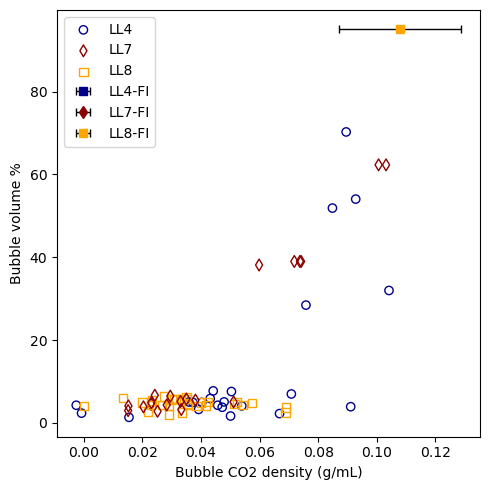

In [8]:
figure_mosaic="""
A

"""
fig,axes=plt.subplot_mosaic(mosaic=figure_mosaic, figsize=(5, 5))
# xlim=[0,1.5]
axes['A'].axes.get_xaxis().set_visible(True)

axes['A'].scatter(lei_mi_new['Density'][lei_mi_new['filename_x'].str.contains('LL4')],lei_mi_new['Bubble volume %'][lei_mi_new['filename_x'].str.contains('LL4')],edgecolor='darkblue',color='none',marker='o',label='LL4')
axes['A'].scatter(lei_mi_new['Density'][lei_mi_new['filename_x'].str.contains('LL7')],lei_mi_new['Bubble volume %'][lei_mi_new['filename_x'].str.contains('LL7')],edgecolor='darkred',color='none',marker='d',label='LL7')

axes['A'].scatter(misrho[mis['Sample_ID'].str.contains('LL4')],misbvol[mis['Sample_ID'].str.contains('LL4')],edgecolor='darkblue',color='none',marker='o')
axes['A'].scatter(misrho[mis['Sample_ID'].str.contains('LL8')],misbvol[mis['Sample_ID'].str.contains('LL8')],edgecolor='orange',color='none',marker='s',label='LL8')
axes['A'].scatter(misrho[mis['Sample_ID'].str.contains('LL7')],misbvol[mis['Sample_ID'].str.contains('LL7')],edgecolor='darkred',color='none',marker='d')

axes['A'].errorbar(LL4_fimean,100,xerr=LL4_std,fmt='s',color='darkblue',label='LL4-FI',ecolor='k',elinewidth=1,capsize=3)
axes['A'].errorbar(LL7_fimean,98,xerr=LL7_std,fmt='d',color='darkred',label='LL7-FI',ecolor='k',elinewidth=1,capsize=3)
axes['A'].errorbar(LL8_fimean,95,xerr=LL8_std,fmt='s',color='orange',label='LL8-FI',ecolor='k',elinewidth=1,capsize=3)

axes['A'].legend()
axes['A'].set_xlabel('Bubble CO2 density (g/mL)')
axes['A'].set_ylabel('Bubble volume %')
fig.tight_layout()

## My figure

In [9]:
LL4_fi_noMI=LL_fi.loc[LL_fi['filename_x'].str.contains('LL4') &  ~(LL_fi['filename_x'].str.contains('MI'))]
LL4_fi_noMI['Density_All']=pf.calculate_density_cornell(temp='SupCrit', Split=LL4_fi_noMI['Corrected_Splitting'])['Preferred D']

C:\Users\penny\AppData\Local\Temp\ipykernel_27348\733894752.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LL4_fi_noMI['Density_All']=pf.calculate_density_cornell(temp='SupCrit', Split=LL4_fi_noMI['Corrected_Splitting'])['Preferred D']


In [10]:
LL7_fi_noMI=LL_fi.loc[LL_fi['filename_x'].str.contains('LL7') &  ~(LL_fi['filename_x'].str.contains('MI'))]
LL7_fi_noMI['Density_All']=pf.calculate_density_cornell(temp='SupCrit', Split=LL7_fi_noMI['Corrected_Splitting'])['Preferred D']

C:\Users\penny\AppData\Local\Temp\ipykernel_27348\1539386887.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LL7_fi_noMI['Density_All']=pf.calculate_density_cornell(temp='SupCrit', Split=LL7_fi_noMI['Corrected_Splitting'])['Preferred D']


In [11]:
LL8_fi_noMI=LL_fi.loc[LL_fi['filename_x'].str.contains('LL8') &  ~(LL_fi['filename_x'].str.contains('MI'))]
LL8_fi_noMI['Density_All']=pf.calculate_density_cornell(temp='SupCrit', Split=LL8_fi_noMI['Corrected_Splitting'])['Preferred D']

C:\Users\penny\AppData\Local\Temp\ipykernel_27348\3818047620.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LL8_fi_noMI['Density_All']=pf.calculate_density_cornell(temp='SupCrit', Split=LL8_fi_noMI['Corrected_Splitting'])['Preferred D']


(0.0, 15.0)

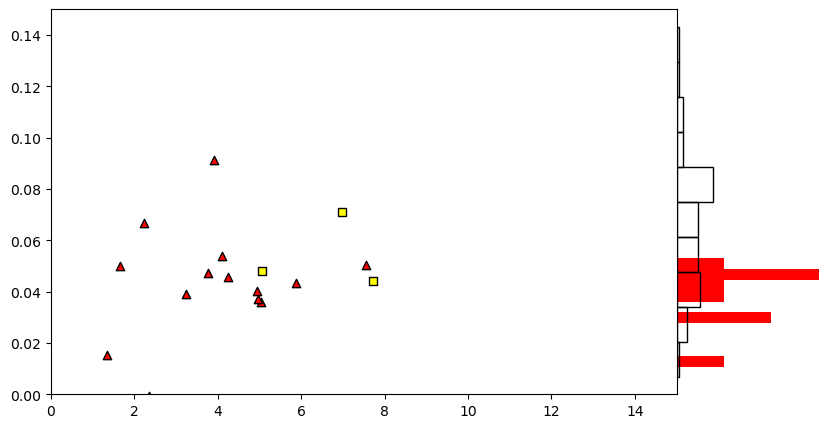

In [19]:
fig, ((ax3a),(ax3b)) = plt.subplots(1, 2, figsize=(10,5),gridspec_kw={'width_ratios': [4.2, 1]})
plt.subplots_adjust(wspace=0, hspace=0)
ax3a.scatter(
                  lei_mi_new['Bubble volume %'].loc[lei_mi_new['filename_x'].str.contains('LL4')],
    lei_mi_new['Density'].loc[lei_mi_new['filename_x'].str.contains('LL4')],
                  edgecolor='k',color='yellow',marker='s',label='LL4')


ax3a.scatter( misbvol[mis['Sample_ID'].str.contains('LL4')],
    misrho[mis['Sample_ID'].str.contains('LL4')],
            edgecolor='k',color='red',marker='^',label='LL4')


ax3a.scatter(100+0*LL4_fi_noMI['Density_All'],
             LL4_fi_noMI['Density_All'],
              edgecolor='k',color='black', marker='o',label='LL4')
             
ax3b.axes.get_xaxis().set_visible(False)
ax3b.axes.get_yaxis().set_visible(False)

ax3b.hist(lei_mi_new['Density'].loc[lei_mi_new['filename_x'].str.contains('LL4')], facecolor='red', orientation='horizontal', density=True)
ax3b.hist(LL4_fi_noMI['Density_All'], facecolor='None', ec='k', orientation='horizontal', density=True)

# ax3b.set_xlim([0, 1])
# ax3a.set_xlim([0, 1])
ax3b.axis("off")

#ax3a.set_xscale('log')
ax3a.set_ylim([0, 0.15])
ax3a.set_xlim([0, 15])

(0.0, 36.77654185958473, -0.007137389717126652, 0.15084174407315168)

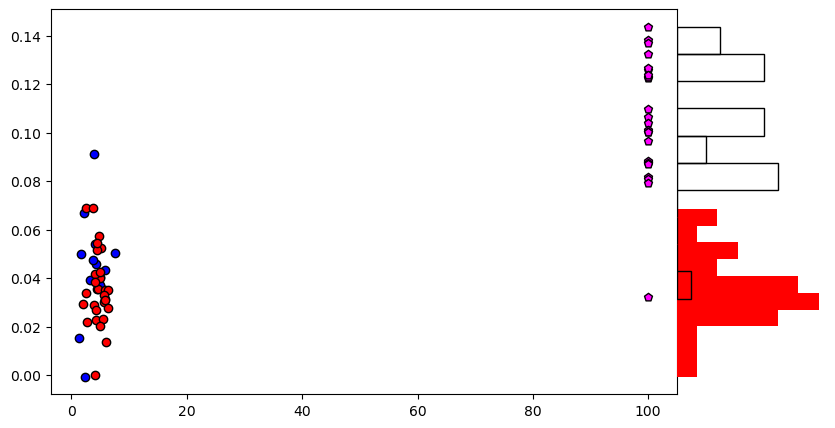

In [24]:
fig, ((ax3a),(ax3b)) = plt.subplots(1, 2, figsize=(10,5),gridspec_kw={'width_ratios': [4.2, 1]})
plt.subplots_adjust(wspace=0, hspace=0)



ax3a.scatter(
                  lei_mi_new['Bubble volume %'].loc[lei_mi_new['filename_x'].str.contains('LL8')],
    lei_mi_new['Density'].loc[lei_mi_new['filename_x'].str.contains('LL8')],
                  edgecolor='k',color='red',marker='o',label='LL8')


ax3a.scatter( misbvol[mis['Sample_ID'].str.contains('LL8')],
    misrho[mis['Sample_ID'].str.contains('LL8')],
            edgecolor='k',color='red',marker='o',label='LL8')


ax3a.scatter(100+0*LL8_fi_noMI['Density_All'],
             LL8_fi_noMI['Density_All'],
              edgecolor='k',color='magenta', marker='p',label='LL8')
             
ax3b.axes.get_xaxis().set_visible(False)
ax3b.axes.get_yaxis().set_visible(False)

ax3b.hist(misrho[mis['Sample_ID'].str.contains('LL8')], facecolor='red', orientation='horizontal', density=True)
ax3b.hist(LL8_fi_noMI['Density_All'], facecolor='None', ec='k', orientation='horizontal', density=True)

# ax3b.set_xlim([0, 1])
# ax3a.set_xlim([0, 1])
ax3b.axis("off")

#ax3a.set_xscale('log')

(0.0, 0.15)

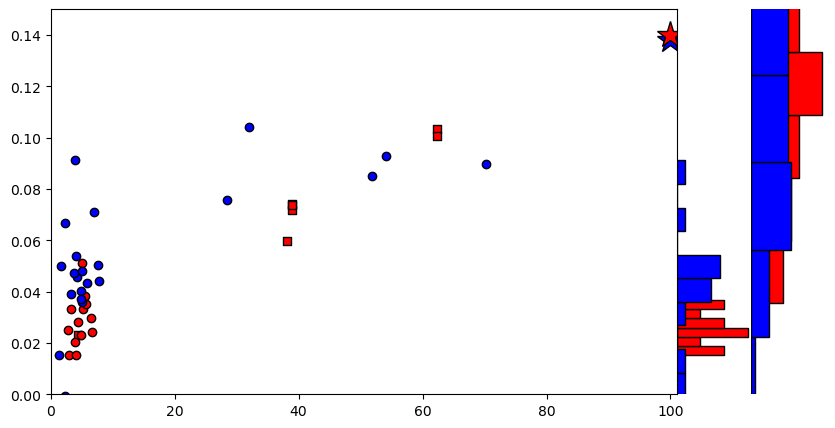

In [45]:
fig, ((ax3a),(ax3b), (ax3c)) = plt.subplots(1, 3, figsize=(10,5),gridspec_kw={'width_ratios': [4.2, 0.5, 0.5]}, sharey=True)
plt.subplots_adjust(wspace=0, hspace=0)
ax3a.scatter(
                  lei_mi_new['Bubble volume %'].loc[lei_mi_new['filename_x'].str.contains('LL7')],
    lei_mi_new['Density'].loc[lei_mi_new['filename_x'].str.contains('LL7')],
                  edgecolor='k',color='red',marker='s',label='LL7')


ax3a.scatter( misbvol[mis['Sample_ID'].str.contains('LL7')],
    misrho[mis['Sample_ID'].str.contains('LL7')],
            edgecolor='k',color='red',marker='o',label='LL7')


# ax3a.scatter(100+0*LL7_fi_noMI['Density_All'],
#              LL7_fi_noMI['Density_All'],
#               edgecolor='k',color='black', marker='o',label='LL7')
             
ax3b.axes.get_xaxis().set_visible(False)
ax3b.axes.get_yaxis().set_visible(False)

ax3c.axes.get_xaxis().set_visible(False)
ax3c.axes.get_yaxis().set_visible(False)

## LL4
ax3a.scatter( misbvol[mis['Sample_ID'].str.contains('LL4')],
    misrho[mis['Sample_ID'].str.contains('LL4')],
            edgecolor='k',color='blue',marker='o',label='LL4')

ax3a.scatter(
                  lei_mi_new['Bubble volume %'].loc[lei_mi_new['filename_x'].str.contains('LL4')],
    lei_mi_new['Density'].loc[lei_mi_new['filename_x'].str.contains('LL4')],
                  edgecolor='k',color='blue',marker='o',label='LL4')


ax3b.hist(misrho[mis['Sample_ID'].str.contains('LL7')], facecolor='red', ec='k', orientation='horizontal', density=True)
ax3b.hist(misrho[mis['Sample_ID'].str.contains('LL4')], facecolor='blue', ec='k', orientation='horizontal', density=True)

ax3c.hist(LL7_fi_noMI['Density_All'], facecolor='red', ec='k', orientation='horizontal', density=True)
ax3c.hist(LL4_fi_noMI['Density_All'],  facecolor='blue', ec='k', orientation='horizontal', density=True)

ax3a.plot(100, np.nanmean(LL4_fi_noMI['Density_All']), '*k', mfc='blue', ms=20)
ax3a.plot(100, np.nanmean(LL7_fi_noMI['Density_All']), '*k', mfc='red', ms=20)

# ax3b.set_xlim([0, 1])
# ax3a.set_xlim([0, 1])
ax3b.axis("off")
ax3c.axis("off")
#ax3a.set_xscale('log')
ax3a.set_xlim([0, 101])
ax3a.set_ylim([0, 0.15])

Text(0.02, 0.95, 'c) LL8 - Aug')

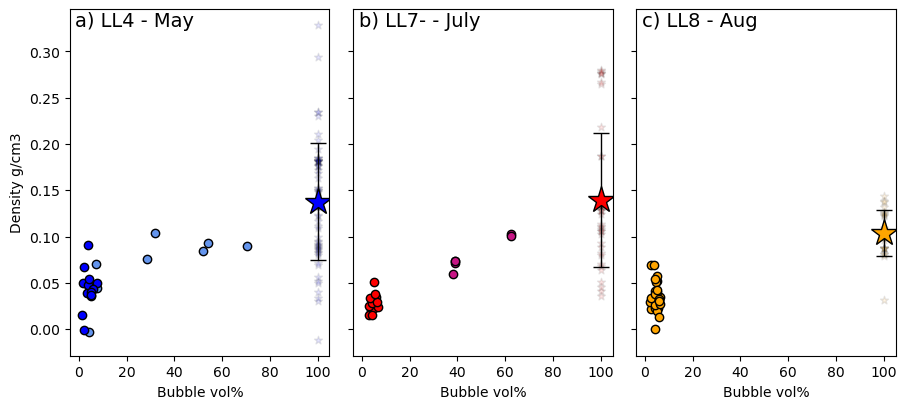

In [83]:
fig, (ax2, ax1, ax3) = plt.subplots(1, 3, figsize=(9,4), sharex=True, sharey=True)
ax1.scatter(
                  lei_mi_new['Bubble volume %'].loc[lei_mi_new['filename_x'].str.contains('LL7')],
    lei_mi_new['Density'].loc[lei_mi_new['filename_x'].str.contains('LL7')],
                  edgecolor='k',color='mediumvioletred',marker='o',label='LL7')

ax1.scatter( misbvol[mis['Sample_ID'].str.contains('LL7')],
    misrho[mis['Sample_ID'].str.contains('LL7')],
            edgecolor='k',color='red',marker='o',label='LL7')
ax1.errorbar(100, np.nanmean(LL7_fi_noMI['Density_All']), 
         xerr=0, yerr= np.nanstd(LL7_fi_noMI['Density_All']),
 fmt='*', ecolor='k', elinewidth=1, mfc='red', ms=20, mec='k', capsize=6)
ax1.scatter(100+0*LL7_fi_noMI['Density_All'],
             LL7_fi_noMI['Density_All'],
              edgecolor='k',color='red', marker='*',label='LL7', alpha=0.1)


ax2.scatter(
                  lei_mi_new['Bubble volume %'].loc[lei_mi_new['filename_x'].str.contains('LL4')],
    lei_mi_new['Density'].loc[lei_mi_new['filename_x'].str.contains('LL4')],
                  edgecolor='k',color='cornflowerblue',marker='o',label='LL4')

ax2.scatter( misbvol[mis['Sample_ID'].str.contains('LL4')],
    misrho[mis['Sample_ID'].str.contains('LL4')],
            edgecolor='k',color='blue',marker='o',label='LL4')
ax2.errorbar(100, np.nanmean(LL4_fi_noMI['Density_All']), 
         xerr=0, yerr= np.nanstd(LL4_fi_noMI['Density_All']),
 fmt='*', ecolor='k', elinewidth=1, mfc='blue', ms=20, mec='k', capsize=6)
ax2.scatter(100+0*LL4_fi_noMI['Density_All'],
             LL4_fi_noMI['Density_All'],
              edgecolor='k',color='blue', marker='*',label='LL4', alpha=0.1)


ax3.scatter(
                  lei_mi_new['Bubble volume %'].loc[lei_mi_new['filename_x'].str.contains('LL8')],
    lei_mi_new['Density'].loc[lei_mi_new['filename_x'].str.contains('LL8')],
                  edgecolor='k',color='lightsalmon',marker='o',label='LL8')

ax3.scatter( misbvol[mis['Sample_ID'].str.contains('LL8')],
    misrho[mis['Sample_ID'].str.contains('LL8')],
            edgecolor='k',color='orange',marker='o',label='LL8')
ax3.errorbar(100, np.nanmean(LL8_fi_noMI['Density_All']), 
         xerr=0, yerr= np.nanstd(LL8_fi_noMI['Density_All']),
 fmt='*', ecolor='k', elinewidth=1, mfc='orange', ms=20, mec='k', capsize=6)
ax3.scatter(100+0*LL8_fi_noMI['Density_All'],
             LL8_fi_noMI['Density_All'],
              edgecolor='k',color='orange', marker='*',label='LL8', alpha=0.1)

#ax1.set_xlim([0, 12])
fig.tight_layout()
ax2.set_ylabel('Density g/cm3')
ax1.set_xlabel('Bubble vol%')
ax2.set_xlabel('Bubble vol%')
ax3.set_xlabel('Bubble vol%')

ax1.annotate("b) LL7- - July", xy=(0.02, 0.95), xycoords="axes fraction", fontsize=14)
ax2.annotate("a) LL4 - May", xy=(0.02, 0.95), xycoords="axes fraction", fontsize=14)
ax3.annotate("c) LL8 - Aug", xy=(0.02, 0.95), xycoords="axes fraction", fontsize=14)


In [66]:
LL4_newMI=lei_mi_new.loc[lei_mi_new['filename_x'].str.contains('LL4')]

In [67]:
LL4_newMI

,filename_x,um/px,X,Y,Bub x,Bub y,MI volume (um3),Bubble volume (um3),Bubble volume %,Density,Corrected_Splitting,Splitting,Diad1_Cent,Diad1_Area,Diad1_Sigma,Diad1_Gamma,Residual_Diad1,Diad2_Cent,Diad2_Area,Diad2_Sigma,Diad2_Gamma,Residual_Diad2,HB1_Cent,HB1_Area,HB2_Cent,HB2_Area,C13_Cent,C13_Area,name_for_matching,filename_y,date,power (mW),Int_time (s),accumulations,Mag (X),duration,24hr_time,sec since midnight,Spectral Center,Ne_Correction
0,LL4-21-MI#1,0.11569,92.362000,78.865000,29.837000,29.837000,653053.116203,27815.961774,4.259372,-0.002516,102.713506,102.939603,1286.491624,35.043382,0.156465,0.156465,1.351721,1389.431227,44.995566,0.139247,0.139247,1.379345,NaN,0,NaN,0,NaN,0,LL4-21-MI#1,LL4-21-MI#1.txt,"October 21, 2022\n",12.010,45,5,50,"['0h', '3m', '46s']",12:26:50 PM\n,44810,1325.004,0.997804
1,LL4-21-MI#2,0.11569,86.715243,72.321261,54.221683,54.221683,522224.056161,166935.077169,31.966179,0.104172,102.997219,103.223531,1285.871293,699.601151,0.299494,0.299494,4.660367,1389.094823,1066.945993,0.252199,0.252199,3.553800,NaN,0,NaN,0,NaN,0,LL4-21-MI#2,LL4-21-MI#2.txt,"October 21, 2022\n",12.058,45,5,50,"['0h', '3m', '46s']",12:16:02 PM\n,44162,1325.004,0.997808
2,LL4-21-MI#4,0.11569,46.794470,36.239646,15.275074,15.275074,73728.206483,3732.317646,5.062266,0.047919,102.847627,103.074687,1286.479327,26.213320,0.096417,0.096417,2.077125,1389.554015,36.403290,0.241365,0.241365,2.111429,NaN,0,NaN,0,NaN,0,LL4-21-MI#4,LL4-21-MI#4.txt,"October 21, 2022\n",20.002,45,5,50,"['0h', '3m', '46s']",12:46:18 PM\n,45978,1325.004,0.997797
3,LL4-21-MI#5,0.11569,27.971890,22.855056,24.491485,20.646426,17013.620223,11950.885045,70.243046,0.089558,102.958355,103.186325,1286.058199,235.909792,0.260009,0.260009,1.678823,1389.244524,368.899505,0.227832,0.227832,1.846780,NaN,0,NaN,0,NaN,0,LL4-21-MI#5,LL4-21-MI#5.txt,"October 21, 2022\n",12.028,45,5,50,"['0h', '3m', '47s']",1:08:48 PM\n,47328,1325.004,0.997791
4,LL4-21-MI#6,0.11569,38.916819,29.000833,14.357193,14.357193,40135.538978,3099.111716,7.721615,0.044207,102.837756,103.065623,1286.241091,67.524730,0.248271,0.248271,1.486341,1389.306715,99.042175,0.199543,0.199543,1.459097,NaN,0,NaN,0,NaN,0,LL4-21-MI#6,LL4-21-MI#6.txt,"October 21, 2022\n",12.052,45,5,50,"['0h', '3m', '46s']",1:15:02 PM\n,47702,1325.004,0.997789
5,LL4-FI3-4-MI#1,0.11569,34.001863,30.846776,26.387521,26.387521,35613.280666,19240.857014,54.027196,0.092818,102.967024,103.196375,1285.998261,364.710423,0.274586,0.274586,2.773068,1389.194636,555.447553,0.238260,0.238260,3.115223,NaN,0,NaN,0,NaN,0,LL4-FI3-4-MI#1,LL4-FI3-4-MI#1.txt,"October 21, 2022\n",12.072,45,5,50,"['0h', '3m', '47s']",2:14:23 PM\n,51263,1325.004,0.997778
6,LL4-FI3-4-MI#2,0.11569,29.833451,25.838690,22.325660,22.325660,22470.386227,11653.101884,51.859820,0.084876,102.945906,103.175344,1286.037346,109.442133,0.281944,0.281944,2.105297,1389.212690,161.145258,0.259200,0.259200,2.715281,NaN,0,NaN,0,NaN,0,LL4-FI3-4-MI#2,LL4-FI3-4-MI#2.txt,"October 21, 2022\n",12.039,45,5,50,"['0h', '3m', '46s']",2:23:41 PM\n,51821,1325.004,0.997776
11,LL4-FI7-MI#1,0.11569,47.194524,38.552860,29.081469,27.134992,81689.776820,23227.804245,28.434163,0.075847,102.921896,103.164214,1286.096406,253.880931,0.266998,0.266998,1.937169,1389.260620,372.688129,0.220352,0.220352,2.193346,NaN,0,NaN,0,NaN,0,LL4-FI7-MI#1,LL4-FI7-MI#1.txt,"October 25, 2022\n",12.063,45,5,50,"['0h', '3m', '47s']",2:45:23 PM\n,53123,1325.004,0.997651
12,LL4-FI7-MI#2,0.11569,53.872243,39.094055,18.974827,18.974827,102517.956344,7154.216748,6.978501,0.070857,102.908624,103.150575,1286.165658,778.259346,0.253464,0.253464,3.770361,1389.316233,1135.878908,0.200195,0.200195,3.972569,NaN,0,NaN,0,NaN,0,LL4-FI7-MI#2,LL4-FI7-MI#2.txt,"October 25, 2022\n",12.025,45,5,50,"['0h', '3m', '47s']",2:36:57 PM\n,52617,1325.004,0.997654


In [69]:
LL7_newMI=lei_mi_new.loc[lei_mi_new['filename_x'].str.contains('LL7')]
LL7_newMI

,filename_x,um/px,X,Y,Bub x,Bub y,MI volume (um3),Bubble volume (um3),Bubble volume %,Density,Corrected_Splitting,Splitting,Diad1_Cent,Diad1_Area,Diad1_Sigma,Diad1_Gamma,Residual_Diad1,Diad2_Cent,Diad2_Area,Diad2_Sigma,Diad2_Gamma,Residual_Diad2,HB1_Cent,HB1_Area,HB2_Cent,HB2_Area,C13_Cent,C13_Area,name_for_matching,filename_y,date,power (mW),Int_time (s),accumulations,Mag (X),duration,24hr_time,sec since midnight,Spectral Center,Ne_Correction
7,LL7-31-MI#1 (1),0.11569,36.393861,31.978220,29.156089,29.156089,41663.892256,25954.723728,62.295485,0.103171,102.994557,103.225020,1285.952404,1316.772953,0.278129,0.278129,9.848280,1389.177424,1988.496206,0.241801,0.241801,10.400488,NaN,0,NaN,0,NaN,0,LL7-31-MI#1 (1),LL7-31-MI#1 (1).txt,"October 21, 2022\n",11.989,45,5,50,"['0h', '3m', '47s']",3:53:19 PM\n,57199,1325.004,0.997767
8,LL7-31-MI#1,0.11569,36.393861,31.978220,29.156089,29.156089,41663.892256,25954.723728,62.295485,0.100623,102.987781,103.218138,1285.952565,1355.459460,0.278507,0.278507,8.975399,1389.170703,2025.655278,0.240454,0.240454,9.153692,NaN,0,NaN,0,NaN,0,LL7-31-MI#1,LL7-31-MI#1.txt,"October 21, 2022\n",12.043,45,5,50,"['0h', '3m', '47s']",3:43:03 PM\n,56583,1325.004,0.997768
9,LL7-FI16-MI#2,0.11569,74.332293,63.730499,24.412700,24.412700,342452.327302,15236.179153,4.449139,0.023007,102.781377,103.011137,1286.384826,516.457222,0.229994,0.229994,8.095214,1389.395962,728.006318,0.170827,0.170827,9.058284,NaN,0,NaN,0,NaN,0,LL7-FI16-MI#2,LL7-FI16-MI#2.txt,"October 21, 2022\n",12.024,45,5,50,"['0h', '3m', '47s']",3:27:32 PM\n,55652,1325.004,0.997770
10,LL7-FI27-MI#3,0.11569,22.047889,18.917792,14.822034,14.822034,8946.564042,3409.981395,38.114983,0.059855,102.879368,103.109016,1286.239408,443.768087,0.256943,0.256943,7.763164,1389.348424,637.346657,0.172578,0.172578,7.201158,NaN,0,NaN,0,NaN,0,LL7-FI27-MI#3,LL7-FI27-MI#3.txt,"October 21, 2022\n",12.020,45,5,50,"['0h', '3m', '47s']",2:53:05 PM\n,53585,1325.004,0.997773
13,LL7-FI28-MI#5_rep1,0.11569,80.054994,59.388901,50.552067,50.552067,347129.751078,135283.671818,38.972076,0.074192,102.917494,103.156642,1286.092756,412.498685,0.263409,0.263409,7.995448,1389.249398,585.249753,0.218189,0.218189,7.914713,NaN,0,NaN,0,NaN,0,LL7-FI28-MI#5_rep1,LL7-FI28-MI#5_rep1.txt,"October 25, 2022\n",12.043,45,5,50,"['0h', '3m', '47s']",1:26:11 PM\n,48371,1325.004,0.997682
14,LL7-FI28-MI#5_rep2,0.11569,80.054994,59.388901,50.552067,50.552067,347129.751078,135283.671818,38.972076,0.071873,102.911326,103.150689,1286.101743,418.086951,0.266469,0.266469,6.834391,1389.252432,608.507985,0.210159,0.210159,5.894485,NaN,0,NaN,0,NaN,0,LL7-FI28-MI#5_rep2,LL7-FI28-MI#5_rep2.txt,"October 25, 2022\n",12.036,45,5,50,"['0h', '3m', '46s']",1:31:56 PM\n,48716,1325.004,0.997679
15,LL7-FI28-MI#5_rep3,0.11569,80.054994,59.388901,50.552067,50.552067,347129.751078,135283.671818,38.972076,0.073773,102.916379,103.155995,1286.113823,430.120114,0.259908,0.259908,5.494936,1389.269818,603.655172,0.207862,0.207862,5.955189,NaN,0,NaN,0,NaN,0,LL7-FI28-MI#5_rep3,LL7-FI28-MI#5_rep3.txt,"October 25, 2022\n",12.024,45,5,50,"['0h', '3m', '46s']",1:37:58 PM\n,49078,1325.004,0.997677


## Finding coentrapped ones

In [86]:
Wieser_LL4=mis[mis['Sample_ID'].str.contains('LL4')]
Wieser_LL7=mis[mis['Sample_ID'].str.contains('LL7')]
Wieser_LL8=mis[mis['Sample_ID'].str.contains('LL8')]

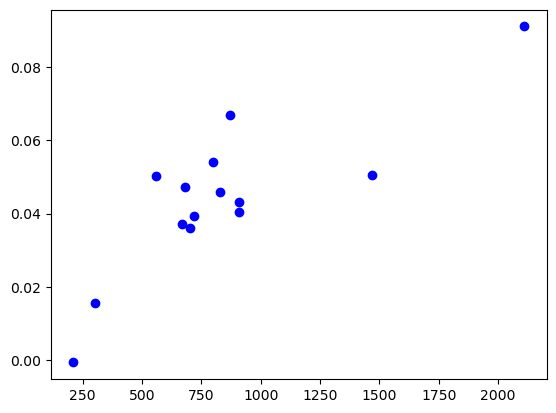

In [90]:
plt.plot(Wieser_LL4['Magmasat Saturation Pressure (bar) (Total, PEC-corr CO2, Measured H2O)'],
         Wieser_LL4['CO2 density (g/cm3)'], 'ob')

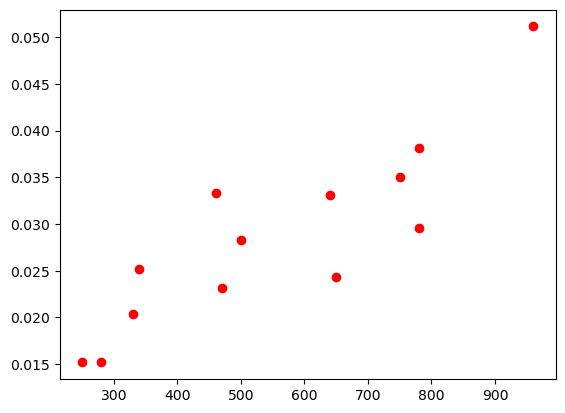

In [89]:
plt.plot(Wieser_LL7['Magmasat Saturation Pressure (bar) (Total, PEC-corr CO2, Measured H2O)'],
         Wieser_LL7['CO2 density (g/cm3)'], 'or')

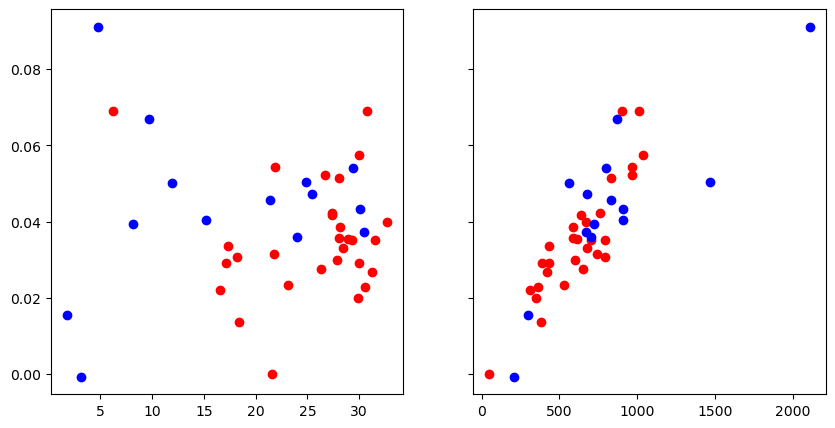

In [100]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5), sharey=True)
ax1.plot(Wieser_LL8['Amount of PEC (%, calculated)'],
         Wieser_LL8['CO2 density (g/cm3)'], 'or')

ax1.plot(Wieser_LL4['Amount of PEC (%, calculated)'],
         Wieser_LL4['CO2 density (g/cm3)'], 'ob')

ax2.plot(Wieser_LL8['Magmasat Saturation Pressure (bar) (Total, PEC-corr CO2, Measured H2O)'],
         Wieser_LL8['CO2 density (g/cm3)'], 'or')

ax2.plot(Wieser_LL4['Magmasat Saturation Pressure (bar) (Total, PEC-corr CO2, Measured H2O)'],
         Wieser_LL4['CO2 density (g/cm3)'], 'ob')

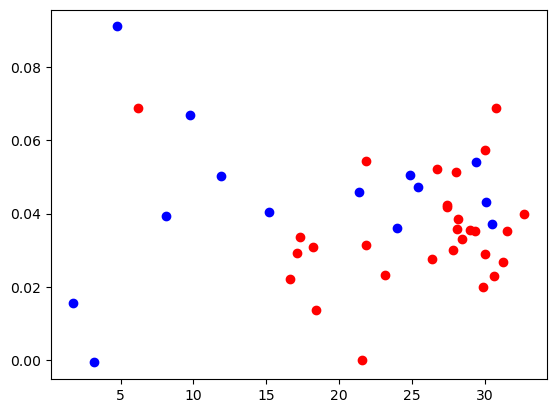

In [95]:
plt.plot(Wieser_LL8['Amount of PEC (%, calculated)'],
         Wieser_LL8['CO2 density (g/cm3)'], 'or')

plt.plot(Wieser_LL4['Amount of PEC (%, calculated)'],
         Wieser_LL4['CO2 density (g/cm3)'], 'ob')

In [93]:
len(Wieser_LL8)

44

In [94]:
len(Wieser_LL7)

24

In [87]:
Wieser_LL4.columns

Index(['Sample_ID', 'Description', 'Sample Name',
       'Specific ID (LL8 - lab code for F8 Mid July, LL7- lab code for Aug 1st, LL4- lab code for May 30th)',
       'Classification (1=bubble with fermi diad, 2=No bubble, 3=bubble but no fermi diad)',
       'Cracked (for ones without diads)', 'Na2O (wt%, measured)',
       'Al2O3 (wt%, measured)', 'P2O5 (wt%, measured)', 'CaO (wt%, measured)',
       'K2O (wt%, measured)', 'TiO2 (wt%, measured)', 'SiO2 (wt%, measured)',
       'MgO (wt%, measured)', 'FeO (wt%, measured)', 'MnO (wt%, measured)',
       'Total', 'H2O (wt%, measured)', 'CO2 (ppm, measured)',
       'Amount of PEC (%, calculated)', 'Na2O (wt%, PEC-corr)',
       'Al2O3 (wt%, PEC-corr)', 'P2O5 (wt%, PEC-corr)', 'CaO (wt%, PEC-corr)',
       'K2O (wt%, PEC-corr)', 'TiO2 (wt%, PEC-corr)', 'SiO2 (wt%, PEC-corr)',
       'MgO (wt%, PEC-corr)', 'FeO (wt%, PEC-corr)', 'MnO (wt%, PEC-corr)',
       'H2O (wt%) (wt%, PEC-corr)', 'CO2 (ppm) (wt%, PEC-corr)',
       'Fo content (mol